In [134]:
import csv
import matplotlib.pyplot as plt

In [135]:
def intersectx(x1, y1, x2, y2, targety):
    return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)

def intersecty(x1, y1, x2, y2, targetx):
    return y1 + (y2 - y1)/ (x2 - x1) * (targetx - x1)

In [136]:
class LHCPmeasure:
    def __init__(self, file):
        with open(file, "r") as filename:
            self.cpgain = list(csv.reader(filename))
            self.Dk = []
            self.lhzero = []
            self.lhninety = []
            for j in range(240):
                zero = []
                ninety = []
                self.Dk.append(float(self.cpgain[0][2*j+1].split("Dk='")[1].split("'")[0]))
                for i in range(1, len(self.cpgain)):
                    zero.append(float(self.cpgain[i][2*j+1]))
                    ninety.append(float(self.cpgain[i][2*j+2]))
                self.lhzero.append(zero)
                self.lhninety.append(ninety)
            self.lhzeroLocalMax = []
            for lhzero in self.lhzero:
                former = lhzero[0]
                localMax = dict()
                localls = []
                deg = []
                for i in range(1, len(lhzero)-1):
                    if (former < lhzero[i]) and (lhzero[i] > lhzero[i+1]):
                        localMax[lhzero[i]] = i-180
                        localls.append(lhzero[i])
                        deg.append(i)
                    former = lhzero[i]
                self.lhzeroLocalMax.append((localMax, localls, deg))
                  
    def lhzeromainLobe(self):
        allDk = self.lhzeroLocalMax
        out = []
        for i in range(len(allDk)):
            localMax, localls, deg = allDk[i][0], allDk[i][1], allDk[i][2]
            lhzero = self.lhzero[i]
            globalMax = max(localMax.keys())
            k = deg[localls.index(globalMax)]
            m = k
            # 低點
            while lhzero[k] > globalMax-3 :
                k -= 1
            LF = intersectx(k-180, lhzero[k], k-179, lhzero[k+1], globalMax-3)
            # 高點
            while lhzero[m] > globalMax -3 :
                m += 1
            HF = intersectx(m-180, lhzero[m], m-181, lhzero[m-1], globalMax-3)
            BW = HF - LF
            out.append((globalMax, LF, HF, BW))
        return out
    
    def lhzeroLeftSideLobe(self):
        allDk = self.lhzeroLocalMax
        out = []
        for i in range(len(allDk)):
            localMax, localls, deg = allDk[i][0], allDk[i][1], allDk[i][2]
            lhzero = self.lhzero[i]
            globalMax = max(localMax.keys())
            x = deg[localls.index(globalMax)-1]
            y = x 
            #print(localls.index(globalMax)+1)
            while lhzero[y] > localls[localls.index(globalMax)-1]-3 :
              y += 1
            #print(y-180, lhzero[k])
            HF = intersectx(y-180, lhzero[y], y-181, lhzero[y-1], localls[localls.index(globalMax)-1]-3)
          #  print(HF)
            z = x
            while lhzero[z] > localls[localls.index(globalMax)-1]-3 :
              z -= 1
            LF = intersectx(z-180, lhzero[z], z-179, lhzero[z-1], localls[localls.index(globalMax)-1]-3)
          #  print(LF)
            out.append((localls[localls.index(globalMax)-1], LF, HF, HF-LF))
        return out

In [137]:
!gdown --id '1LyxhKTmin1WuS5O2wd4v1ERAB9iu8n5G' --output cpgain.csv

Downloading...
From: https://drive.google.com/uc?id=1LyxhKTmin1WuS5O2wd4v1ERAB9iu8n5G
To: /content/cpgain.csv
6.29MB [00:00, 20.0MB/s]


In [138]:
cplobegain = LHCPmeasure('cpgain.csv')

In [139]:
len(cplobegain.cpgain[0])

965

In [140]:
len(cplobegain.lhzero[0])

361

In [141]:
len(cplobegain.lhzeroLocalMax)

240

In [142]:
cplobegain.lhzeroLocalMax[235]

({-24.5211952818569: 125,
  -22.6217274453337: -125,
  -19.8003999260059: -156,
  -18.9008103276436: 156,
  0.274659778731834: -53,
  0.318582153599583: 53,
  6.21847886851202: 0},
 [-19.8003999260059,
  -22.6217274453337,
  0.274659778731834,
  6.21847886851202,
  0.318582153599583,
  -24.5211952818569,
  -18.9008103276436],
 [24, 55, 127, 180, 233, 305, 336])

In [143]:
len(cplobegain.lhzeromainLobe())

240

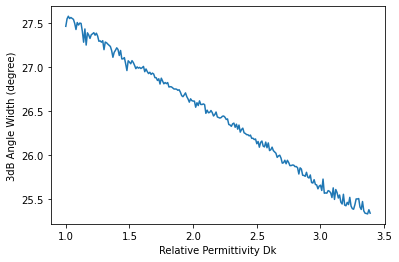

In [157]:
# Main Lobe 3dB Angle Width
BW = []
x = cplobegain.lhzeromainLobe()
for i in range(240):
  BW.append(x[i][3])

plt.plot(cplobegain.Dk, BW)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("3dB Angle Width (degree)")
plt.show()

In [166]:
import numpy as np

#線性回歸的簡易分析
args = np.polyfit(cplobegain.Dk, BW, 1)

print("Prediction Equation : y =", args[0],"x +", args[1])

Prediction Equation : y = -0.9362246490848422 x + 28.49051775594615


In [152]:
import scipy.stats as stats
print('Correlation Coefficient of Dk and Angle Width =',stats.pearsonr(cplobegain.Dk, BW)[0])

Correlation Coefficient of Dk and Angle Width = -0.9981398828454443


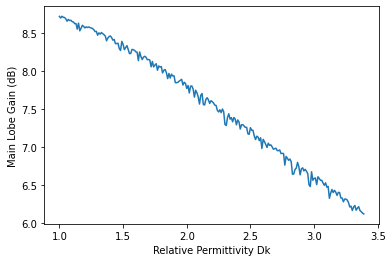

In [156]:
# Main Lobe Gain
Max = []
x = cplobegain.lhzeromainLobe()
for i in range(240):
    Max.append(x[i][0])
plt.plot(cplobegain.Dk, Max)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Main Lobe Gain (dB)")
plt.show()

In [153]:
print('Correlation Coefficient of Dk and Main Lobe Gain =',stats.pearsonr(cplobegain.Dk, Max)[0])

Correlation Coefficient of Dk and Main Lobe Gain = -0.9967315348025616


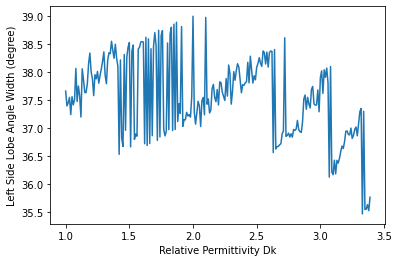

In [158]:
# Left Side Lobe Angle Width
AW = []
x = cplobegain.lhzeroLeftSideLobe()
for i in range(240):
    AW.append(x[i][3])

plt.plot(cplobegain.Dk, AW)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Left Side Lobe Angle Width (degree)")
plt.show()


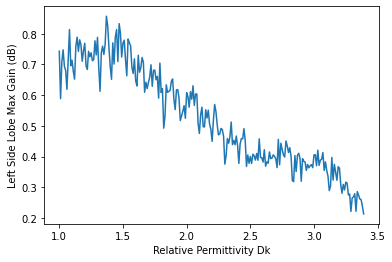

In [159]:
# Left Side Lobe Max Gain
A = []
x = cplobegain.lhzeroLeftSideLobe()
for i in range(240):
    A.append(x[i][0])

plt.plot(cplobegain.Dk, A)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Left Side Lobe Max Gain (dB)")
plt.show()

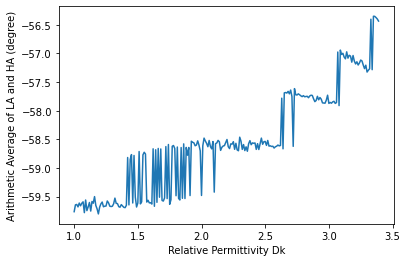

In [161]:
Y = []
x = cplobegain.lhzeroLeftSideLobe()
for i in range(240):
    Y.append((x[i][1]+x[i][2])/2)

plt.plot(cplobegain.Dk, Y)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Arithmetic Average of LA and HA (degree)")
plt.show()

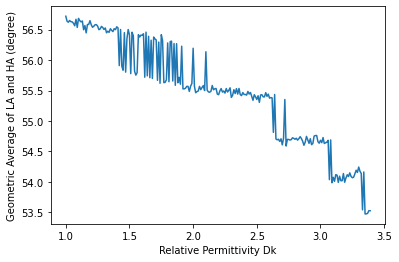

In [162]:
Y = []
x = cplobegain.lhzeroLeftSideLobe()
for i in range(240):
    Y.append((x[i][1]*x[i][2])**0.5)
plt.plot(cplobegain.Dk, Y)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Geometric Average of LA and HA (degree)")
plt.show()